In [ ]:
# import libraries
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.metrics import classification_report

In [ ]:
#Add your corresponding files here.

import numpy as np
X_train = np.load('/X_train_n12c.npy')
y_train = np.load('/y_train_n12c.npy')
X_val = np.load('/X_val_n12c.npy')
y_val = np.load('/y_val_n12c.npy')
X_test = np.load('/X_test_n12c.npy')
y_test = np.load('/y_test_n12c.npy')



X_temp = np.load('/X_temp_n12c.npy')
y_temp = np.load('/y_temp_n12c.npy')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, Activation, Add, Input, Concatenate, GlobalAveragePooling2D, DepthwiseConv2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Input shape for the network
input_shape = (40, 24, 1)
num_classes = 12  # Adjust the number of classes to 12

# Create an input layer
input_tensor = Input(shape=input_shape)

# Initial Conv Layer (stride=1, no padding)
x = Conv2D(8, (3, 3), strides=(1, 1), padding='valid')(input_tensor)
x = BatchNormalization()(x)
x = ReLU()(x)

# Depthwise Separable Convolution Block 1 (reduced filters)
x = DepthwiseConv2D((3, 3), padding='valid', strides=(1, 1))(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(16, (1, 1), padding='valid')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

# Further reducing the number of convolutional filters
x = Conv2D(32, (3, 3), strides=(1, 1))(x)
x = BatchNormalization()(x)
x = ReLU()(x)

# Depthwise Separable Convolution Block 2
x = DepthwiseConv2D((3, 3), strides=(1, 1))(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(64, (1, 1))(x)
x = BatchNormalization()(x)
x = ReLU()(x)

# Global Average Pooling and Output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Reduced the number of neurons
output_tensor = Dense(num_classes, activation='softmax')(x)

# Create the model
mobilenet_model = Model(input_tensor, output_tensor)

# Compile the model
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
mobilenet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 40, 24, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 38, 22, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 38, 22, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 38, 22, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d (DepthwiseConv2D)   │ (None, 36, 20, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 20, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 36, 20, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 36, 20, 16)          │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 36, 20, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 36, 20, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 18, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 34, 18, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 34, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_1 (DepthwiseConv2D) │ (None, 32, 16, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 32, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 16, 64)          │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,740 (108.36 KB)

 Trainable params: 27,420 (107.11 KB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
input_tensor.shape

(None, 40, 24, 1)

In [ ]:
input_shape

(40, 24, 1)

In [ ]:
# Add early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = mobilenet_model.fit(X_train, y_train, epochs=24, batch_size=32, validation_data=(X_val, y_val), shuffle=True,callbacks=[early_stopping])

In [ ]:
mobilenet_model.save('modelparams.h5')

In [ ]:
new_model = tf.keras.models.load_model('/modelparams.h5')

# Show the model architecture
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 40, 24, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 38, 22, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 38, 22, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 38, 22, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d (DepthwiseConv2D)   │ (None, 36, 20, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 20, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 36, 20, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 36, 20, 16)          │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 36, 20, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 36, 20, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 18, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 34, 18, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 34, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_1 (DepthwiseConv2D) │ (None, 32, 16, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 32, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 16, 64)          │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,742 (108.37 KB)

 Trainable params: 27,420 (107.11 KB)

 Non-trainable params: 320 (1.25 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
# prompt: How to evaluate the model thus formed with x_test

import numpy as np
# Evaluate the model on the test set
loss, accuracy = new_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Generate predictions
y_pred = mobilenet_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_test_classes, y_pred_classes))


In [ ]:
y_predm1 = new_model.predict(X_temp)

# If you want to convert predictions to class labels
y_pred_classesm1 = np.argmax(y_predm1, axis=1)

# Similarly, convert y_test to class labels (if needed)
y_test_classes = np.argmax(y_temp, axis=1)

# Optionally, you can evaluate the model performance
test_loss, test_accuracy = new_model.evaluate(X_temp, y_temp)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8249 - loss: 0.5433
Test Loss: 0.5405141711235046
Test Accuracy: 0.8256250023841858


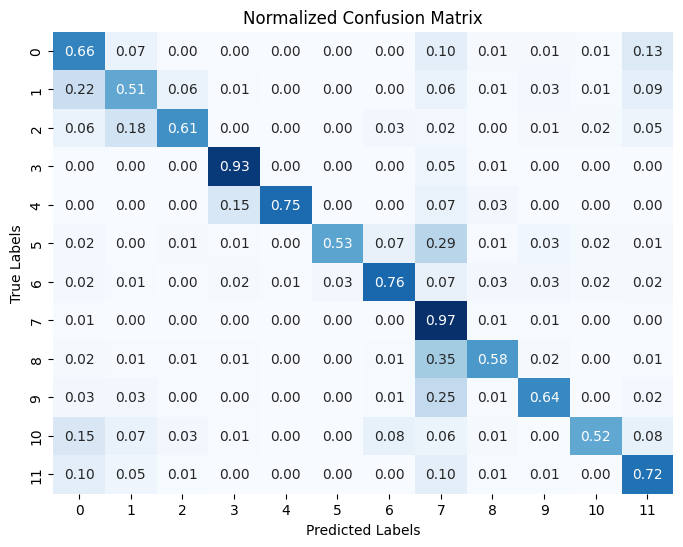

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classesm1)

# Normalize the confusion matrix by dividing each value by the sum of the corresponding row (i.e., true labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the plot with 300 DPI
plt.savefig('confus_quick_11c.png', dpi=300, bbox_inches='tight')

# Optionally, display the plot
plt.show()


In [ ]:
for layer in new_model.layers:
    print(layer.name)

input_layer
conv2d
batch_normalization
re_lu
depthwise_conv2d
batch_normalization_1
re_lu_1
conv2d_1
batch_normalization_2
re_lu_2
conv2d_2
batch_normalization_3
re_lu_3
depthwise_conv2d_1
batch_normalization_4
re_lu_4
conv2d_3
batch_normalization_5
re_lu_5
global_average_pooling2d
dense
dense_1


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Classification Report (includes precision, recall, f1-score)
report = classification_report(y_test_classes, y_pred_classesm1, output_dict=True)

# Convert classification report to a DataFrame for better visualization
import pandas as pd
report_df = pd.DataFrame(report).transpose()

# Print or display the DataFrame
print(report_df)

# Calculate the accuracy, precision, recall, and F1 score separately
accuracy = accuracy_score(y_test_classes, y_pred_classesm1)
precision = precision_score(y_test_classes, y_pred_classesm1, average='macro')
recall = recall_score(y_test_classes, y_pred_classesm1, average='macro')
f1 = f1_score(y_test_classes, y_pred_classesm1, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classesm1)

# Since you have 8 classes, the confusion matrix will be 8x8
# Calculate sensitivity and specificity for each class

sensitivity_per_class = []
specificity_per_class = []

for i in range(len(cm)):
    # True Positives for this class
    tp = cm[i, i]
    # False Positives: sum of the corresponding column minus TP
    fp = cm[:, i].sum() - tp
    # False Negatives: sum of the corresponding row minus TP
    fn = cm[i, :].sum() - tp
    # True Negatives: sum of all elements of cm minus the row, column, and TP
    tn = cm.sum() - (tp + fp + fn)

    # Sensitivity (Recall) for this class
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    sensitivity_per_class.append(sensitivity)

    # Specificity for this class
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    specificity_per_class.append(specificity)

# Display Sensitivity and Specificity for each class
for i in range(len(cm)):
    print(f"Sensitivity (Recall) for class {i}: {sensitivity_per_class[i]}")
    print(f"Specificity for class {i}: {specificity_per_class[i]}")



In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Classification Report (includes precision, recall, f1-score)
report = classification_report(y_test_classes, y_pred_classesm1, output_dict=True)

# Convert classification report to a DataFrame for better visualization
import pandas as pd
report_df = pd.DataFrame(report).transpose()

# Print or display the DataFrame
print(report_df)

# Calculate the accuracy, precision, recall, and F1 score separately
accuracy = accuracy_score(y_test_classes, y_pred_classesm1)
precision = precision_score(y_test_classes, y_pred_classesm1, average='macro')
recall = recall_score(y_test_classes, y_pred_classesm1, average='macro')
f1 = f1_score(y_test_classes, y_pred_classesm1, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classesm1)

# Since you have 8 classes, the confusion matrix will be 8x8
# For specificity, calculate it manually for each class

specificity_per_class = []
for i in range(len(cm)):
    # True Positives for this class
    tp = cm[i, i]
    # False Positives: sum of the corresponding column minus TP
    fp = cm[:, i].sum() - tp
    # False Negatives: sum of the corresponding row minus TP
    fn = cm[i, :].sum() - tp
    # True Negatives: sum of all elements of cm minus the row, column, and TP
    tn = cm.sum() - (tp + fp + fn)

    specificity = tn / (tn + fp)
    specificity_per_class.append(specificity)

# Display Specificity for each class
for i, spec in enumerate(specificity_per_class):
    print(f"Specificity for class {i}: {spec}")


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test_classes and y_predm1 are your true labels and predicted probabilities, respectively

# Binarize the y_test_classes to get one-hot encoded labels for multiclass
y_test_bin = label_binarize(y_test_classes, classes=np.arange(12))  # Assuming classes are [0, 1, 2, ..., 11]

# Initialize variables to store FPR, TPR, and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Calculate ROC and AUC for each class
for i in range(12):  # 12 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_predm1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 10))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'cyan', 'magenta', 'yellow', 'gray', 'black']  # Added one more color for 12th class
for i in range(12):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 12 Classes')
plt.legend(loc='lower right')

# Save the ROC curve plot with 300 DPI
plt.savefig('roc_curve_12_classes.png', dpi=300, bbox_inches='tight')

# Optionally, display the plot
plt.show()

# Calculate the macro-average AUC for the multiclass classification
overall_auc = roc_auc_score(y_test_bin, y_predm1, average='macro', multi_class='ovr')
print(f'Overall Macro-Average AUC: {overall_auc:.2f}')
